<a href="https://colab.research.google.com/github/wilcastano/Encuestas/blob/main/Encuestas_Alcaldia_de_Cali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Cargar el archivo Excel en un DataFrame de Pandas
archivo_excel = "Encuestas_Cali.xlsx"
df = pd.read_excel(archivo_excel)

In [ ]:
df

,Fecha,Encuestadora,Chontico,Eder,Diana_Rojas,Miyerlandi,Danis_Renteria,Voto_Blanco,NS,Otros
0,2023-07-11,Lombana,0.2420,0.1480,0.0870,0.0650,0.0150,0.1330,0.2320,0.0780
1,2023-07-31,Mosqueteros,0.3202,0.1192,0.0842,0.1283,0.0292,0.1481,0.0000,0.1708
2,2023-08-04,CNC,0.2610,0.1580,0.1400,0.0910,0.0000,0.1000,0.1720,0.0780
3,2023-08-06,Guarumo,0.2760,0.1650,0.1320,0.0860,0.0000,0.0740,0.1350,0.1320
4,2023-08-17,Lombana,0.2340,0.1540,0.0990,0.0690,0.0210,0.1380,0.1920,0.0930
5,2023-08-21,CNC,0.2290,0.0970,0.0680,0.0910,0.0350,0.1680,0.1900,0.1220
6,2023-08-22,Mosqueteros,0.3428,0.1345,0.0977,0.1612,0.0467,0.0693,0.0000,0.1478
7,2023-08-31,Invamer,0.4380,0.1580,0.1070,0.0770,0.0450,0.0720,0.0000,0.1030
8,2023-09-11,RCN,0.4360,0.1540,0.1430,0.0850,0.0690,0.0780,0.0050,0.0300
9,2023-09-16,Guarumo,0.2280,0.1740,0.1050,0.0320,0.0810,0.1070,0.2130,0.0600


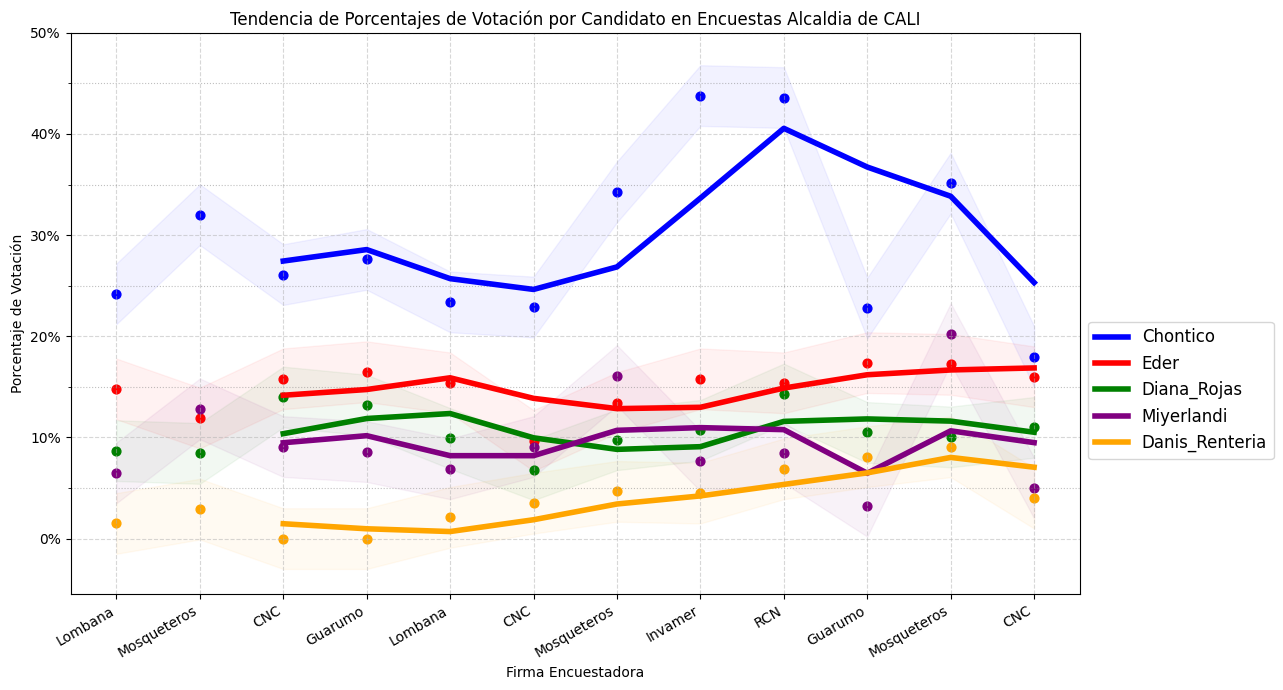

In [ ]:
# Colores asignados a cada candidato
colores = {'Chontico': 'blue', 'Eder': 'red', 'Diana_Rojas': 'green', 'Miyerlandi': 'purple',
           'Danis_Renteria': 'orange', 'Voto_Blanco': 'brown', 'NS': 'pink', 'Otros': 'gray'}

# Crear una figura y un eje para el gráfico
plt.figure(figsize=(11, 7))

# Definir el número de encuestas para el promedio móvil
num_encuestas_promedio = 3

# Graficar el promedio móvil de porcentaje de voto para cada candidato
candidatos = ['Chontico', 'Eder', 'Diana_Rojas', 'Miyerlandi', 'Danis_Renteria']
for candidato in candidatos:
    promedio_movil = df[candidato].rolling(window=num_encuestas_promedio).mean()
    plt.plot(df.index, promedio_movil, label=candidato, linewidth=4, color=colores[candidato])

# Calcular límites superiores e inferiores para la banda de confianza
conf_interval = 0.03  # Ajustar el nivel de confianza según necesidad
for candidato in candidatos:
    upper_bound = df[candidato] + conf_interval
    lower_bound = df[candidato] - conf_interval
    plt.fill_between(df.index, lower_bound, upper_bound, color=colores[candidato], alpha=0.05)

# Graficar puntos con los valores reales de cada encuesta
for candidato in candidatos:
    plt.scatter(df.index, df[candidato], color=colores[candidato], s=40, label='_nolegend_')  # El uso de '_nolegend_' evita duplicación de etiquetas

# Personalizar el gráfico
plt.xlabel('Firma Encuestadora')
plt.ylabel('Porcentaje de Votación')
plt.title('Tendencia de Porcentajes de Votación por Candidato en Encuestas Alcaldia de CALI')
plt.grid(True, linestyle='--', alpha=0.5)  # Configurar la malla con líneas discontinuas y tono más claro
plt.grid(True, linestyle=':', alpha=0.5, axis='y', which='minor', color='gray')  # Líneas menores de la malla


# Configurar el eje Y para mostrar porcentaje
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))  # Formatear como porcentaje con 1 decimal

# Definir ubicación y tono de las líneas de la malla en el eje Y
plt.gca().set_yticks([i/20 for i in range(11)], minor=True)  # Líneas cada 5%

# Rotar las etiquetas del eje X para que sean legibles
plt.xticks(df.index, df['Encuestadora'], rotation=30, ha='right')

# Ajustar el espaciado entre las etiquetas del eje X para que se muestren todas
plt.tight_layout()

# Mostrar el gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5), fontsize='large')
plt.show()



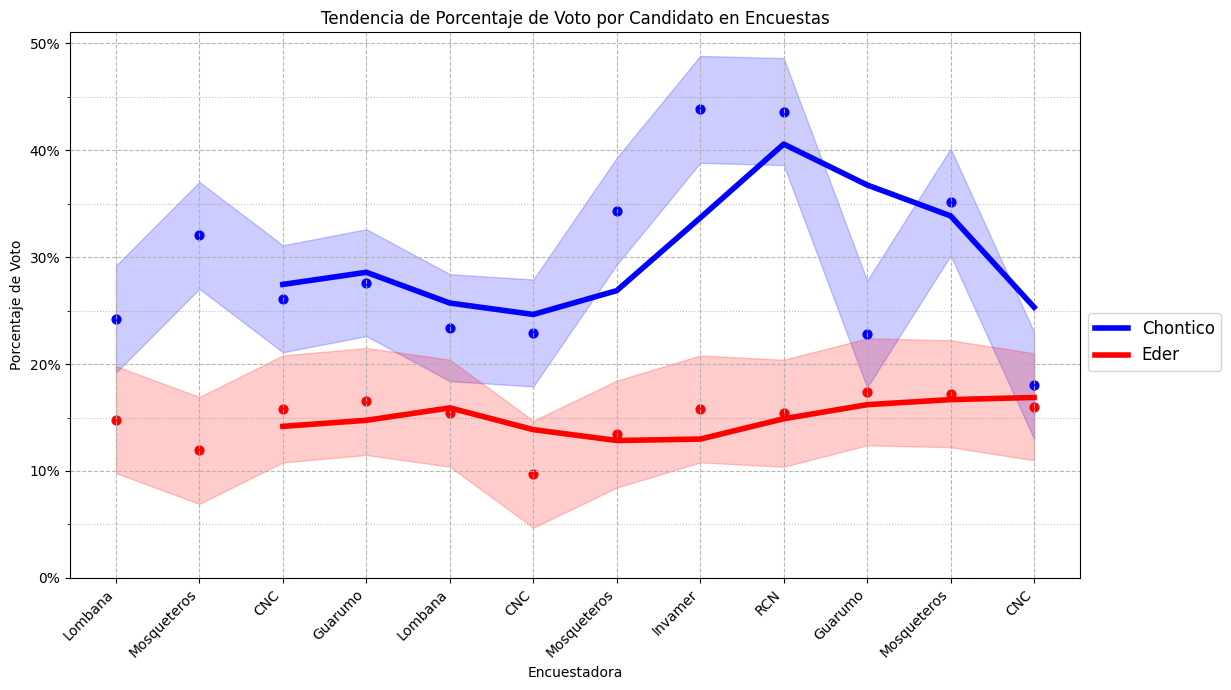

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Cargar el archivo Excel en un DataFrame de Pandas
archivo_excel = "Encuestas_Cali.xlsx"
df = pd.read_excel(archivo_excel)

# Colores asignados a cada candidato (puedes personalizarlos)
colores = {'Chontico': 'blue', 'Eder': 'red', 'Diana_Rojas': 'green', 'Miyerlandi': 'purple',
           'Danis_Renteria': 'orange', 'Voto_Blanco': 'brown', 'NS': 'pink', 'Otros': 'gray'}

# Crear una figura y un eje para el gráfico
plt.figure(figsize=(11, 7))

# Definir el número de encuestas para el promedio móvil
num_encuestas_promedio = 3

# Graficar el promedio móvil de porcentaje de voto para cada candidato
candidatos = ['Chontico', 'Eder']
for candidato in candidatos:
    promedio_movil = df[candidato].rolling(window=num_encuestas_promedio).mean()
    plt.plot(df.index, promedio_movil, label=candidato, linewidth=4, color=colores[candidato])

# Calcular límites superiores e inferiores para la banda de confianza
conf_interval = 0.05  # Ajusta el nivel de confianza según tus necesidades
for candidato in candidatos:
    upper_bound = df[candidato] + conf_interval
    lower_bound = df[candidato] - conf_interval
    plt.fill_between(df.index, lower_bound, upper_bound, color=colores[candidato], alpha=0.2)

# Graficar puntos con los valores reales de cada encuesta
for candidato in candidatos:
    plt.scatter(df.index, df[candidato], color=colores[candidato], s=40, label='_nolegend_')  # El uso de '_nolegend_' evita duplicación de etiquetas

# Personalizar el gráfico
plt.xlabel('Encuestadora')
plt.ylabel('Porcentaje de Voto')
plt.title('Tendencia de Porcentaje de Voto por Candidato en Encuestas')
plt.grid(True, linestyle='--', alpha=0.9)  # Configurar la malla con líneas discontinuas y tono más claro
plt.grid(True, linestyle=':', alpha=0.5, axis='y', which='minor', color='gray')  # Líneas menores de la malla cada 5%


# Configurar el eje Y para mostrar porcentaje
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))  # Formatear como porcentaje con 1 decimal

# Definir ubicación y tono de las líneas de la malla en el eje Y
plt.gca().set_yticks([i/20 for i in range(11)], minor=True)  # Líneas cada 5%

# Rotar las etiquetas del eje X para que sean legibles
plt.xticks(df.index, df['Encuestadora'], rotation=45, ha='right')

# Ajustar el espaciado entre las etiquetas del eje X para que se muestren todas
plt.tight_layout()

# Mostrar el gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5), fontsize='large')
plt.show()

